In [1]:
# el cumputo pesado lo hago antes, estas son filminas que no son pretenciosas
%matplotlib inline


import pandas as pd

import numpy as np

import skcriteria as sc
from skcriteria import norm
from skcriteria.madm import topsis, wsum, moora, wprod, electre

from matplotlib import pyplot as plt
import radar

from IPython.display import display

df = pd.read_csv("../sites.csv")[:-3]
anames = df.columns[2:].values

def to_apply(r):
    new = []
    for e in r:
        if isinstance(e , str):
            e = float(e.replace("*", ""))
        new.append(e)
    return new

mtx = df[anames][3:].dropna()[anames].apply(to_apply).T.values
criteria = [sc.MIN if c == "min" else sc.MAX for c in df.Criteria[3:][~df.Armazones.isnull()].values]

cnames = df["Criteria/Alternatives"][3:].apply(lambda r: r.strip())[~df[3:].Armazones.isnull()].values
cnames = map(lambda s: s.decode("utf8"), cnames)

data = sc.Data(mtx, criteria, anames=anames, cnames=cnames)

dm = topsis.TOPSIS()
topsis_dec = dm.decide(data)

dm = wsum.MDWeightedSum()
wsum_dec = dm.decide(data)

dm = wprod.WeightedProduct()
wprod_dec = dm.decide(data)

dm = electre.ELECTRE1()
electre_dec = dm.decide(data)

methods = ["TOPSIS", "WSUM", "WPROD"]
kernel = np.array([1 if idx  in electre_dec.kernel_ else 0 for idx, _ in enumerate(anames)])
ranks = np.vstack((topsis_dec.rank_, wsum_dec.rank_, wprod_dec.rank_, kernel)).T
results = pd.DataFrame(ranks, index=anames, columns=methods + ["ELECTRE 1"])

resume = results[methods].T.describe().T[["min", "max", "mean", "std"]]
resume.columns = "Best", "Worst", "Mean", "Std"
resume = resume.sort_values(["Mean", "Std"])


def data_plot():

    mincrits = np.squeeze(np.where(data.criteria == sc.MIN))
    mincrits_inverted = 1.0 / data.mtx[:, mincrits]
    pdata = data.mtx.astype(mincrits_inverted.dtype.type)
    pdata[:, mincrits] = mincrits_inverted

    N = len(data.criteria)
    theta = radar.radar_factory(N, frame='polygon')

    spoke_labels = data.cnames

    fig, ax = plt.subplots(figsize=(6, 6), nrows=1, ncols=1,
                           subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    ax.set_rgrids([0.5])
    for d, color in zip(norm.sum(pdata, axis=0), colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = data.anames
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')
#     fig.text(0.5, 0.965, "E-ELT Sites",
#              horizontalalignment='center', color='black', weight='bold',
#              size='large')

    plt.show()

# European Extremely Large Telescope site selection
### A comparison between real selection and multicriteria-decision-analysis suggestions


Juan B Cabral – Bruno O Sanchez  – Manuel Starck Cuffini

[Instituto de Astronomía Teórica y Experimental](https://iate.oac.uncor.edu/)

jbcabral@oac.unc.edu.ar- bruno@oac.unc.edu.ar- mstarck@oac.unc.edu.ar

## Agenda

- European Extremely Large Telescope.
- Sitios Candidatos.
- Caracteristicas de los sitios.
- Métodos elegidos.
- Resultados.

### European Extremely Large Telescope

<img src='./imgs/eelt.jpg' width='80%'>

### European Extremely Large Telescope

Un telescopio es un gran colector de luz.

No aumenta, sino que concentra la intensidad de la luz.

El tamaño del espejo primario dicta la capacidad del instrumento.

### Espejos en los telescopios del mundo
<img src='./imgs/mirrors.jpg' style="width: 65%;">

<small>Corresponde al instrumento óptico de mayor envergadura en esta primer mitad del siglo XXI</small>

### E-ELT en perspectiva

<img src='./imgs/eeltvs.webp' style="width: 85%;">

## Sitios Candidatos

Los lugares predilectos en el mundo para la ubicación de instrumental astronómico reúnen características especiales:

* Lugares elevados
* Baja humedad
* Atmósfera sin turbulencia (llamado *seeing*)
* Alejados de la contaminación lumínica
* % de noches utilizables
* Velocidad de los vientos
* Logística

### Los Sitios
<img src='./imgs/sites.jpg' style="width:85%;">

### Armazones (Sitio elegido)

<img src='./imgs/armazones.png' style="width: 65%;">

### Aklim

<img src='./imgs/aklim.png' style="width: 65%;">

## Observatorio Roque de los Muchachos
<img src='./imgs/orm.png' style="width: 65%;">

### Ventarrones

<img src='./imgs/ventarrones.png' style="width: 65%;">

### Macón

<img src='./imgs/macon.png' style="width: 55%;">

### Características de los sitios

Un sitio astronómico es caracterizado cuando se determinan las **condiciones atmosféricas** a lo largo de un **período de tiempo**.

La caracterización del cerro Macón consistió en campañas de duración intermedia (~meses) a lo largo de varios años. 

De esta forma se reunieron datos específicos como los valores de humedad, presión, fracción de nubosidad, temperatura, velocidad de viento a lo largo de un tiempo $> 1$ año.

Además se llevaron a cabo observaciones astronómicas para determinar el *seeing* ($\varepsilon$, $\theta$, $\tau_0$).

## Data

In [2]:
display(data)

ALT./CRIT.,Altitude (AMSL) (max),Total seeing ε (′′) (min),Isoplanatic angle θ 0 (′′) (max),Coherence time τ 0 (ms) (max),Cloud: clear fraction (%) (max),Night temperature at 2 m (°C) (min),Night relative humidity at 2 m (%) (min),Night wind speed at 10 m (m=s) (min)
Armazones,3064,0.64,2.04,4.6,89,7.5,21,7.2
Aklim,2350,1,1.29,3.53,76,12.5,32,6.2
ORM,2346,0.8,1.93,5.58,84,7.3,21,8.2
Ventarrones,2837,0.91,1.96,4.9,85,10.9,14,5.9
Macon,4653,0.87,1.37,3.37,75,-0.2,20,11.3


## Métodos

**Weighted sum model (WSum)** <small>(Fishburn, 1967)</small>

This method scalarizes the set of objectives into a single
objective by multiplying each objective with a user supplied
weight.

----

**Weighted Product Model (WProd)** <small>(Bridgman, 1922) (Miller and Starr, 1969)</small>

Each decision alternative is compared with the others by multiplying a number of ratios, one for each decision criterion. Each ratio is raised to the power equivalent to the relative weight of the corresponding criterion.

## Métodos (cont.)

**Technique for Order of Preference by Similarity to Ideal Solution (TOPSIS)** <small>(Hwang and Yoon, 1981)</small>

Based on the concept that the chosen alternative should have the shortest geometric distance from the positive ideal solution and the longest geometric distance from the negative ideal solution.

----

**ELimination Et Choix Traduisant la REalité (ELECTRE)** <small>(Roy, 1968)</small>

There are two main parts to an ELECTRE application: first, the construction of one or several outranking relations, which aims at comparing in a comprehensive way each pair of actions; second, an exploitation procedure that elaborates on the recommendations obtained in the first phase.

## Resultados

In [3]:
results

,TOPSIS,WSUM,WPROD,ELECTRE 1
Armazones,2,1,2,0
Aklim,5,5,5,0
ORM,3,4,4,0
Ventarrones,4,3,3,0
Macon,1,2,1,1


In [4]:
resume

,Best,Worst,Mean,Std
Macon,1.0,2.0,1.333333,0.57735
Armazones,1.0,2.0,1.666667,0.57735
Ventarrones,3.0,4.0,3.333333,0.57735
ORM,3.0,4.0,3.666667,0.57735
Aklim,5.0,5.0,5.000000,0.00000


## Concluyendo

### Como se ven los datos?

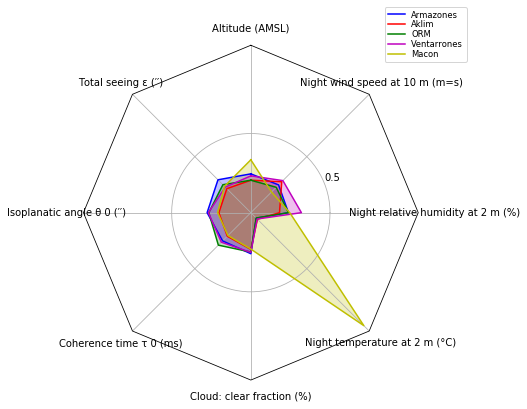

In [6]:
data_plot()

### Paranal

<img src='imgs/dobleparanal.png ' style="width: 80%;">

### Paranal

<img src='imgs/paranal.png ' style="width: 70%;">

## ¿Preguntas?

[Instituto de Astronomía Teórica y Experimental](https://iate.oac.uncor.edu/)

jbcabral@oac.unc.edu.ar - bruno@oac.unc.edu.ar

**Todo el trabajo y datos esta disponible en:** https://github.com/toros-astro/epio2017_EELT_MCDM